In [1]:
import cv2
import numpy as np
import math
import os
from matplotlib import pyplot as plt 

In [2]:
#image = cv2.imread("images/test/hello/1.jpg")
image = cv2.imread("temp/1.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
histogramtest = cv2.calcHist([gray_image], [0],  None, [256], [0, 256])

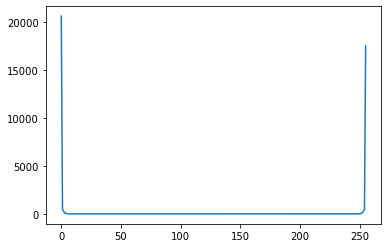

In [3]:
plt.plot(histogramtest)
plt.show()

In [30]:
image = cv2.imread('temp/tempno.png') 
cv2.imshow("no", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
gray_image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
histogramno = cv2.calcHist([gray_image1], [0],  None, [256], [0, 256])

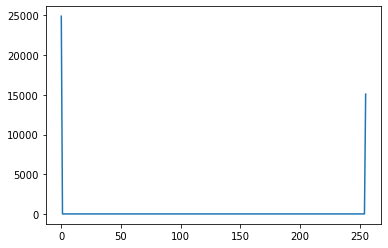

In [32]:
plt.plot(histogramno)
plt.show()

In [22]:
image = cv2.imread('temp/temphello.png') 
cv2.imshow("hello", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
gray_image2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
histogramhello = cv2.calcHist([gray_image2], [0],  
                          None, [256], [0, 256]) 

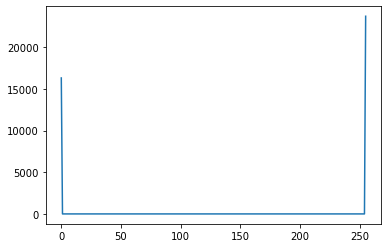

In [23]:
plt.plot(histogramhello)
plt.show()

In [33]:
image = cv2.imread('temp/tempyes.png') 
cv2.imshow("yes", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
gray_image2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
histogramyes = cv2.calcHist([gray_image2], [0],  
                          None, [256], [0, 256]) 

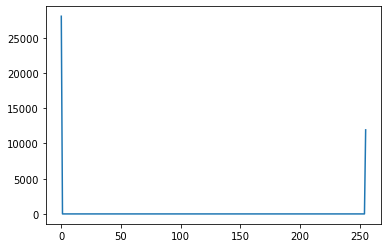

In [34]:
plt.plot(histogramyes)
plt.show()

In [35]:
image = cv2.imread('temp/tempi.png') 
cv2.imshow("I", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
gray_image2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
histogrami = cv2.calcHist([gray_image2], [0],  
                          None, [256], [0, 256]) 

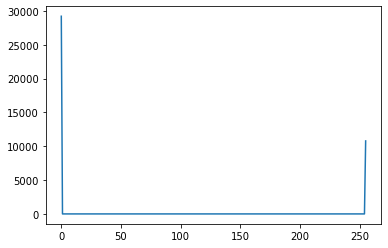

In [36]:
plt.plot(histogrami)
plt.show()

In [12]:
c1, c2,c3, c4= 0,0,0,0

In [13]:
i = 0
while i<len(histogramtest) and i<len(histogramno): 
    c1+=(histogramtest[i]-histogramno[i])**2
    i+= 1
c1 = c1**(1 / 2) 
   

In [14]:
j = 0
while j<len(histogramtest) and j<len(histogramhello): 
    c2+=(histogramtest[j]-histogramhello[j])**2
    j+= 1
c2 = c2**(1 / 2) 

In [15]:
z = 0
while z<len(histogramtest) and z<len(histogramyes): 
    c3+=(histogramtest[z]-histogramyes[z])**2
    z+= 1
c3 = c3**(1 / 2) 

In [16]:
w = 0
while w<len(histogramtest) and w<len(histogrami): 
    c4+=(histogramtest[w]-histogrami[w])**2
    w+= 1
c4 = c4**(1 / 2) 

In [17]:
if(c1 <= c2 and c1 <= c3): 
    string = "sign is no"
elif(c2 <= c1 and c2 <= c3): 
    string = "sign is hello"
else: 
    string = "sign is yes"
string

'sign is no'

In [18]:
def calculate(histogramweb):
    c1, c2, c3, c4 = 0,0,0,0
    
    i = 0
    while i<len(histogramweb) and i<len(histogramno): 
        c1+=(histogramweb[i]-histogramno[i])**2
        i+= 1
    c1 = c1**(1 / 2) 
    
    j = 0
    while j<len(histogramweb) and j<len(histogramhello): 
        c2+=(histogramweb[j]-histogramhello[j])**2
        j+= 1
    c2 = c2**(1 / 2)
    
    z = 0
    while z<len(histogramweb) and z<len(histogramyes): 
        c3+=(histogramweb[z]-histogramyes[z])**2
        z+= 1
    c3 = c3**(1 / 2)   
    
    w = 0
    while w<len(histogramweb) and w<len(histogrami): 
        c4+=(histogramweb[w]-histogrami[w])**2
        w+= 1
    c4 = c4**(1 / 2) 
    
    clist = [c1,c2,c3,c4]
    minimum = min(clist)
    if c1 == minimum:
        string = "sign is no"
    elif c2 == minimum:
        string = "sign is hello"
    elif c3 == minimum:
        string = "sign is yes"
    else:
        string = "sign is i"
    return string

In [19]:
cap = cv2.VideoCapture(0)
while True:

    try:
        ret, frame = cap.read()
        frame=cv2.flip(frame,1)
        kernel = np.ones((3,3),np.uint8)
        roi=frame[100:300, 100:300]
        cv2.rectangle(frame,(100,100),(300,300),(0,255,0),0)
        hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        lower_skin = np.array([0,20,70], dtype=np.uint8)
        upper_skin = np.array([20,255,255], dtype=np.uint8)
        mask = cv2.inRange(hsv, lower_skin, upper_skin)
        mask = cv2.dilate(mask,kernel,iterations = 4)

        #image is blurred using GBlur
        #mask = cv2.GaussianBlur(mask,(5,5),100)
        ret,thresh = cv2.threshold(mask,0,255,cv2.THRESH_BINARY)
        contours,hierarchy= cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cnt = max(contours, key = lambda x: cv2.contourArea(x))
        epsilon = 0.0005*cv2.arcLength(cnt,True)
        approx= cv2.approxPolyDP(cnt,epsilon,True)
        hull = cv2.convexHull(cnt)
        

        hull = cv2.convexHull(approx, returnPoints=False)
        defects = cv2.convexityDefects(approx, hull)
        count_defects = 0
        
        for i in range(defects.shape[0]):
            s,e,f,d = defects[i,0]
            
            path = 'temp'
            cv2.imwrite(os.path.join(path , 'temp.png'), thresh)
            image = cv2.imread("temp/temp.png")
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            histogramweb = cv2.calcHist([gray_image], [0],  None, [256], [0, 256])
            x = calculate(histogramweb)
            #print(x)
            cv2.putText(frame, x, (0,50), cv2.FONT_HERSHEY_SIMPLEX, 2,(0,0,255),2)
  
        cv2.imshow('mask',mask)
        cv2.imshow('frame',frame)
        cv2.imshow('threshold',thresh)
    except:
        pass


    if cv2.waitKey(1) == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

In [125]:
clist = [c1,c2,c3,c4]
clist

[array([6013.33], dtype=float32),
 array([621.2021], dtype=float32),
 array([9777.324], dtype=float32),
 array([10575.949], dtype=float32)]

In [129]:
minimum = min(clist)
if c1 == minimum:
    string = "no"
elif c2 == minimum:
    string = "hello"
elif c3 == minimum:
    string = "yes"
else:
    string = "i"

In [130]:
string

'hello'